# Finger 2

Antes de comenzar descomprimir el archivo properati-AR-2017-08-01-properties-sell-six_months.csv.gz dentro
Utilizando Apache Spark se desea obtener:
* Evolución del precio usd por m2 promedio de las ventas de departamentos en CABA para los últimos 6 meses. Cuál fue el precio usd por m2 promedio (promedio de la columna price_usd_per_m2) para las propiedades publicadas en Febrero 2017, cuál fue para Marzo 2017, …, Julio 2017.
* Para cada mes obtener cuáles fueron las 10 propiedades con el menor precio por m2 y cuáles fueron las 10 propiedades con el mayor precio por m2.
* Y para cada uno de los meses indicar cuantas propiedades tienen +/- 20% del promedio de precio por m2. 

Mostrar los datos y para los puntos 1 y 3 realizar una visualización de los mismos.

Los datos son los mismos del TP, que pueden descargarse en http://www.properati.com.ar/data/

Utilizar el dataset properati-AR-2017-08-01-properties-sell-six_months.csv.gz

Para cargar los datos en Spark pueden utilizar la librería pyspark_csv.

In [47]:
import pyspark
import matplotlib.pyplot as plt
plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

try: 
    type(sc)
except NameError:
    sc = pyspark.SparkContext('local[*]')

from pyspark.sql import SQLContext
sqlCtx = SQLContext(sc)

import pyspark_csv as pycsv
sc.addPyFile('pyspark_csv.py')
plaintext_rdd = sc.textFile('properati-AR-2017-08-01-properties-sell-six_months.csv')
dataframe = pycsv.csvToDataFrame(sqlCtx, plaintext_rdd)
propsRDD = dataframe.rdd

propsRDD.take(20)

[Row(id='ad916bad59cdaf3c24c2d594547aa6067c4d6289', created_on=datetime.datetime(2017, 2, 1, 0, 0), operation='sell', property_type='PH', place_name='Mataderos', place_with_parent_names='|Argentina|Capital Federal|Mataderos|', country_name='Argentina', state_name='Capital Federal', geonames_id=3430787, lat-lon='-34.6618237,-58.5088387', lat=-34.6618237, lon=-58.5088387, price=62000, currency='USD', price_aprox_local_currency=1093959.0, price_aprox_usd=62000.0, surface_total_in_m2=55, surface_covered_in_m2=40, price_usd_per_m2=1127.2727272727273, price_per_m2=1550.0, floor=None, rooms=None, expenses=None, properati_url='http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele', description='2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por

Primeramente vamos a analizar la evolucion del precio por m2 promedio de ventas en CABA para los ultimos seis meses

In [2]:
priceAndDatePropsRDD = propsRDD.map(lambda row: (row.created_on,row.price_usd_per_m2))
priceAndDatePropsRDD.take(20)

[(datetime.datetime(2017, 2, 1, 0, 0), 1127.2727272727273),
 (datetime.datetime(2017, 2, 1, 0, 0), None),
 (datetime.datetime(2017, 2, 1, 0, 0), 1309.090909090909),
 (datetime.datetime(2017, 2, 1, 0, 0), None),
 (datetime.datetime(2017, 2, 1, 0, 0), 1828.5714285714287),
 (datetime.datetime(2017, 2, 1, 0, 0), None),
 (datetime.datetime(2017, 2, 1, 0, 0), 1226.4150943396226),
 (datetime.datetime(2017, 2, 1, 0, 0), 3066.6666666666665),
 (datetime.datetime(2017, 2, 1, 0, 0), 3000.0),
 (datetime.datetime(2017, 2, 1, 0, 0), None),
 (datetime.datetime(2017, 2, 1, 0, 0), 46.23513870541612),
 (datetime.datetime(2017, 2, 1, 0, 0), None),
 (datetime.datetime(2017, 2, 1, 0, 0), 2948.7179487179487),
 (datetime.datetime(2017, 2, 1, 0, 0), 2234.0),
 (datetime.datetime(2017, 2, 1, 0, 0), 3521.4285714285716),
 (datetime.datetime(2017, 2, 1, 0, 0), 1524.3902439024391),
 (datetime.datetime(2017, 2, 1, 0, 0), 1707.142857142857),
 (datetime.datetime(2017, 2, 1, 0, 0), 1789.7727272727273),
 (datetime.dateti

Filtro los registros que tienen precio none, entre Febrero y Agosto, Capital Federal y formateo el periodo en cuestion

In [44]:
def getPeriodMonth(date):
    return date.strftime("%B")

priceAndDatePropsRDD = propsRDD.filter(lambda row: row.state_name == 'Capital Federal' and row.price_usd_per_m2 != None and row.created_on.month < 8 and row.created_on.month > 1)\
    .map(lambda row: ((row.created_on.month, getPeriodMonth(row.created_on)),(row.price_usd_per_m2,1)))
priceAndDatePropsRDD.take(50)

[((2, 'February'), (1127.2727272727273, 1)),
 ((2, 'February'), (1309.090909090909, 1)),
 ((2, 'February'), (3066.6666666666665, 1)),
 ((2, 'February'), (3000.0, 1)),
 ((2, 'February'), (2234.0, 1)),
 ((2, 'February'), (3521.4285714285716, 1)),
 ((2, 'February'), (1707.142857142857, 1)),
 ((2, 'February'), (3365.3846153846152, 1)),
 ((2, 'February'), (2292.3728813559323, 1)),
 ((2, 'February'), (1744.1860465116279, 1)),
 ((2, 'February'), (1812.5, 1)),
 ((2, 'February'), (2181.818181818182, 1)),
 ((2, 'February'), (875.0, 1)),
 ((2, 'February'), (1702.127659574468, 1)),
 ((2, 'February'), (1091.2698412698412, 1)),
 ((2, 'February'), (2200.0, 1)),
 ((2, 'February'), (1705.0, 1)),
 ((2, 'February'), (2721.1111111111113, 1)),
 ((2, 'February'), (2750.3703703703704, 1)),
 ((2, 'February'), (8333.333333333334, 1)),
 ((2, 'February'), (1542.857142857143, 1)),
 ((2, 'February'), (3460.0, 1)),
 ((2, 'February'), (1918.421052631579, 1)),
 ((2, 'February'), (2198.0, 1)),
 ((2, 'February'), (944.

In [137]:
result = priceAndDatePropsRDD.reduceByKey(lambda x, y: (x[0]+y[0],x[1]+y[1])).sortBy(lambda x: x[0][0])\
    .map(lambda x: (x[0][1],x[1][0]/x[1][1]) )
resultGraph = result.collect()

In [113]:
dataFrame = result.toDF(["Mes", "Promedio en U$s"])
dataFrame.show()

+--------+------------------+
|     Mes|   Promedio en U$s|
+--------+------------------+
|    July|2737.3926392203934|
|    June| 2559.346806454973|
|     May|2478.6733667837484|
|   April| 6346.059361632207|
|   March|2628.6393760048427|
|February| 2551.199705392356|
+--------+------------------+



In [138]:
resultGraph

[('February', 2551.199705392356),
 ('March', 2628.6393760048427),
 ('April', 6346.059361632207),
 ('May', 2478.6733667837484),
 ('June', 2559.346806454973),
 ('July', 2737.3926392203934)]

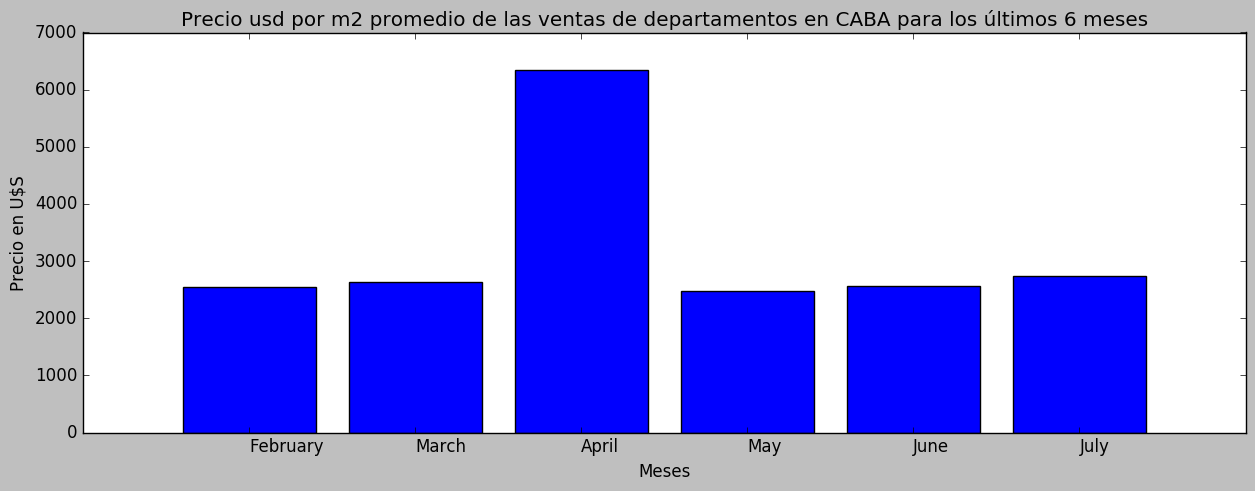

In [148]:
#dataFrame.bar(#.plot(x='place_name',kind='bar',title='Top 10 de precios de propiedades en CABA')
#plt.xlabel('Mes')
#plt.ylabel('Precio promedio en U$S')
import numpy as np

months = [t[0] for t in resultGraph]
x_pos = np.arange(len(months))
crimes = [t[1] for t in resultGraph]

plt.bar(y_pos, crimes, align="center")
plt.xticks(x_pos, months, ha='left')
plt.ylabel('Precio en U$S')
plt.xlabel('Meses')
plt.title('Precio usd por m2 promedio de las ventas de departamentos en CABA para los últimos 6 meses')

plt.show()

Punto 2

In [174]:
from heapq import nlargest, nsmallest

def topTen(prices):
    return nlargest(10, prices)

def tailTen(prices):
    return nsmallest(10, prices)

byMonthRDD = priceAndDatePropsRDD.map(lambda x: ((x[0][0],x[0][1]),x[1][0])).groupByKey()\
    .map(lambda x: (x[0],("mayor precio por m2",topTen(x[1])),("menor precio por m2",tailTen(x[1]))))\
    .sortBy(lambda x: x[0][0]).map(lambda x: (x[0][1],x[1]))
byMonthRDD.take(6)

[('February',
  ('mayor precio por m2',
   [12121.212121212122,
    10126.582278481013,
    10000.0,
    9667.673716012085,
    9565.217391304348,
    8333.333333333334,
    8333.333333333334,
    8080.80808080808,
    8000.0,
    7375.0])),
 ('March',
  ('mayor precio por m2',
   [25000.0,
    12796.208530805687,
    10000.0,
    9215.686274509804,
    9215.686274509804,
    9215.686274509804,
    9215.686274509804,
    9076.923076923076,
    8947.368421052632,
    8750.0])),
 ('April',
  ('mayor precio por m2',
   [206333.33333333334,
    173826.06666666668,
    104486.11428571428,
    78533.33333333333,
    35783.78378378379,
    35591.836734693876,
    34608.0,
    34534.48275862069,
    33000.0,
    32486.486486486487])),
 ('May',
  ('mayor precio por m2',
   [19230.76923076923,
    13698.630136986301,
    13181.818181818182,
    9966.666666666666,
    9937.888198757764,
    9803.149606299212,
    9655.172413793103,
    9523.809523809523,
    8163.265306122449,
    7975.4601226993

Punto 3

In [171]:
def percent(price):
    return (price[0] <= 1.2*price[1]) and (price[1]*0.8 <= price[0])

joinAvg = priceAndDatePropsRDD.map(lambda x: (x[0][1],(x[0][0], x[1][0]))).join(result)\
    .filter(lambda x: percent((x[1][0][1],x[1][1]))).map(lambda x: ((x[1][0][0],x[0]),1)).reduceByKey(lambda x,y: x+y)\
    .sortBy(lambda x: x[0][0]).map(lambda x: (x[0][1],x[1]))
joinAvg.take(10)

[('February', 389),
 ('March', 581),
 ('April', 108),
 ('May', 1046),
 ('June', 1297),
 ('July', 6516)]

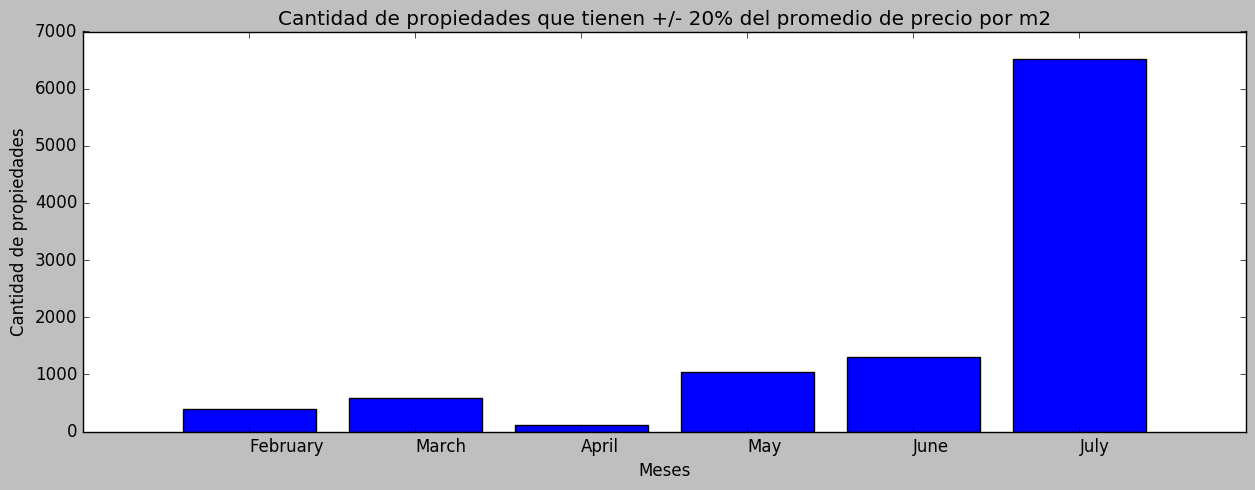

In [172]:
resultGraphAvg = joinAvg.collect()

months = [t[0] for t in resultGraphAvg]
x_pos = np.arange(len(months))
crimes = [t[1] for t in resultGraphAvg]

plt.bar(y_pos, crimes, align="center")
plt.xticks(x_pos, months, ha='left')
plt.ylabel('Cantidad de propiedades')
plt.xlabel('Meses')
plt.title('Cantidad de propiedades que tienen +/- 20% del promedio de precio por m2')

plt.show()